<a href="https://colab.research.google.com/github/changyong93/TIL/blob/main/1.%20python/210707_Tensorflow_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_1%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenizer

## Word Tokenization

### 영어 : Word Tokenization
- 단어 단위로 토큰화를 수행하는 것

#### NLTK 토크나이저 비교

In [ ]:
import nltk
# 영어는 토큰화를 위해 일반적으로 nltk 패키지를 활용
# nltk도 토큰화를 위한 여러개의 패키지가 존재
# 토크나이저에 따라서도 결과가 다름

In [ ]:
sentence = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."

아포스트로피가 들어간 상황에서 Don't와 Jone's가 어떻게 구분이 될지 확인

In [ ]:
# 문장, 단어 토큰화 시 문장부호 데이터를 사전에 불러와야 함
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
print("word_tokenize")
print(word_tokenize(sentence))
print("*"*100)
print("wordpuncttokenizer")
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(sentence))
print("*"*100)
print("TreebankTokenizer")
from nltk.tokenize import TreebankWordTokenizer
print(TreebankWordTokenizer().tokenize(sentence))

word_tokenize
['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
****************************************************************************************************
wordpuncttokenizer
['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
****************************************************************************************************
TreebankTokenizer
['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


- wordtokenizer, trebank : Don't => Do, n't / Jone's => Jone, 's
- wordpunctTokenizer : Don't => Don, ', t / Jone's => Jone', s
- ** treebanktokenizer 규칙
  1. 하이픈으로 연결된 단어는 하나로 인식
  2. 아포스트로피와 같이 접어가 들어간 단어는 분리
---
토크나이저마다 저마다의 규칙이 다르기에 사용하고자하는 목적에 따라 성능이 잘 나오는 토크나이저를 선택하는 것이 중요

### 한국어 : Word Tokenization(KoNLPy)
---
한국어의 경우 영어보다 토큰화가 까다로우며, 어절 단위로 토큰화를 하는 것을 지양(띄어쓰기가 잘 지켜지지 않을 수 있음)

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 450kB 38.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# Mecab-ko-for-GoogleColab
# https://github.com/SOMJANG/Mecab-ko-for-Google-Colab
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

# Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-07 19:07:53--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=EITCegME7TOrmgRW6iOHYwnWT88%3D&Expires=1625686673&AWSAccessKeyId=AKIA6KO

In [ ]:
from konlpy.tag import *
# konlpy 안에 형태소 분석기는 총 5개가 있으며,
# 아래 형태소 분석기는 모두 noun, morphs, pos 제공
# noun : 형태소 분석기가 분석 후 명사 추출
# morphs : 형태소에 따라 토큰화
# pos : 형태소에 따라 토큰화 후 품사도 같이 태깅
hannunum = Hannanum()
kkma = Kkma()
okt = Okt()
mecab = Mecab()
komoran = Komoran()
sent = "열심히 코딩한 당신, 연휴에는 여행을 가봐요"

#### Hannanum

In [ ]:
print(hannunum.nouns(sent))
print(hannunum.morphs(sent))
print(hannunum.pos(sent))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에는', '여행', '을', '가', '아', '보', '아']
[('열심히', 'M'), ('코딩', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('당신', 'N'), (',', 'S'), ('연휴', 'N'), ('에는', 'J'), ('여행', 'N'), ('을', 'J'), ('가', 'P'), ('아', 'E'), ('보', 'P'), ('아', 'E')]


#### KKma

In [ ]:
print(kkma.nouns(sent))
print(kkma.morphs(sent))
print(kkma.pos(sent))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


#### Okt

In [ ]:
print(okt.nouns(sent))
print(okt.morphs(sent))
print(okt.pos(sent))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


#### Komoran

In [ ]:
print(komoran.nouns(sent))
print(komoran.morphs(sent))
print(komoran.pos(sent))

['코', '당신', '연휴', '여행']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '아', '보', '아요']
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('아', 'EC'), ('보', 'VX'), ('아요', 'EC')]


#### Mecab (별도 설치 필요)

In [ ]:
print(mecab.nouns(sent))
print(mecab.morphs(sent))
print(mecab.pos(sent))

['코딩', '당신', '연휴', '여행']
['열심히', '코딩', '한', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '봐요']
[('열심히', 'MAG'), ('코딩', 'NNG'), ('한', 'XSA+ETM'), ('당신', 'NP'), (',', 'SC'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('봐요', 'EC+VX+EC')]


- 동일한 형태소라도, 분석기마다 표기 방식이 조금씩 차이가 있음
- 보통 형태소 단위를 입력으로 많이 쓰지만, 품사까지 엮어서 입력으로 사용하는 경우도 있음
  - ex) '못'의 경우 부정의 못도 있지만, 명사의 못도 있기 때문
  - ('열심히','Adverb') => '열심히_Adverb'
- 형태소 분석기마다 성능과 결과다 다르기 때문에, 용도에 따라 분석기를 선택적으로 사용, ex) 속도가 빠른 형태소 분석기를 선택하고자 하면 mecab 등...

## Sentence Tokenization

### 영어 : Sentence Tokenization
---
직관적으로 봤을 때, 온점이나 물음표 등으로 구분하면 괜찮을 것 같지만, 마냥 그렇지도 않다. 예를 들어 Ph.D나 IP주소(192.2.201.2) 등과 같이 하나의 데이터 자체에 온점이 들어가 있는데, 모든 온점으로 구분할 시 모두 다 문장으로 나뉘게 되는 문제가 발생한다.   
명확한 규칙이 있으면 좋겠지만, 따로 세우기 어렵다면 nltk의 문장토큰화인 sent_tokenize를 사용하자

In [ ]:
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to mae sure no one was near."

In [ ]:
from nltk.tokenize import sent_tokenize
# 영어에도 다양한 문장 토크나이저가 존재하지만, 유원준 강사님의 오랜 경험으로 보셨을 때 sent_tokenize가 가장 성능이 좋다고 하심
sent_tokenize(text)

['His barber kept his word.',
 'But keeping such a huge secret to himself was driving him crazy.',
 'Finally, the barber went up a mountain and almost to the edge of a cliff.',
 'He dug a hole in the midst of some reeds.',
 'He looked about, to mae sure no one was near.']

In [ ]:
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
sent_tokenize(text)

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']

Ph.D도의 온점과 문장의 마침표인 온점 구분을 잘 함

### 한국어 : Sentence Tokenization(KSS)

In [ ]:
!pip install kss

     |████████████████████████████████| 71kB 4.1MB/s 


In [ ]:
import kss
text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요. 이제 해보면 알걸요?'
kss.split_sentences(text)

['딥 러닝 자연어 처리가 재미있기는 합니다.',
 '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요.',
 '농담아니에요.',
 '이제 해보면 알걸요?']

### 한국어 띄어쓰기 패키지(Pykospacing)

In [1]:
#https://github.com/haven-jeon/PyKoSpacing
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-gm3fa273
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-gm3fa273
  Created wheel for pykospacing: filename=pykospacing-0.5-cp37-none-any.whl size=2255829 sha256=9a70e38747ee387dc2088ab5c857b7bad82e2d2b69261ac2eee14e256d5d0424
  Stored in directory: /tmp/pip-ephem-wheel-cache-j3iwco5t/wheels/4d/45/58/e26cb2b7f6a063d234158c6fd1e5700f6e15b99d67154340ba
Successfully built pykospacing


In [2]:
from pykospacing import Spacing
spacing = Spacing()

sent = '오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
sent1 = '오지호는 극중두얼굴의사나이성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
new_sent = sent.replace(" ","")
print("정상 문장: ", sent)
print("띄어쓰기가 일부만 안 된 문장: ", sent1)
print("띄어쓰기가 안 된 문장: ",new_sent)
print("Kospacing 결과: ", spacing(new_sent))
print("Kospacing 결과(일부만 안 된 문장): ", spacing(sent1))

정상 문장:  오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.
띄어쓰기가 일부만 안 된 문장:  오지호는 극중두얼굴의사나이성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.
띄어쓰기가 안 된 문장:  오지호는극중두얼굴의사나이성준역을맡았다.성준은국내유일의태백권전승자를가리는결전의날을앞두고20년간동고동락한사형인진수(정의욱분)를찾으러속세로내려온인물이다.
Kospacing 결과:  오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.
Kospacing 결과(일부만 안 된 문장):  오지호는 극 중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결 전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속 세로 내려온 인물이다.


같은 kospacing 패키지를 사용했더라도, 일부만 띄어쓰기가 되어있는 문장과 완전히 띄어쓰기가 안 된 문장 사이에 조금 차이가 있음   
- '극중두얼굴의사나이성준'만 안된 경우 => 극 중 두 얼굴의 사나이 성준
- 다 안된 경우 => 극중 두 얼굴의 사나이 성준   
'극 중'과 '극중'이 다름

# Text Normalization
---
- 텍스트 정규화(Text Normalzation)은 통일할 수 있는 단어들을 하나로 통일하기 위한 전처리
- 보통 정규표현식이나 자신만의 규칙으로 정규화를 할 수 있지만, Stemming이나 Lemmatization도 사용
- 딥러닝 이전에는 IT-DFM 등 단어의 빈도수가 성능에 영향을 주어서 정규화가 매우 중요했지만, 현재는 bert 모델을 사용 시 단어를 subword 수준으로 판단하기에 크게 중요성은 떨어짐

## 영어 : Stemming(어간 추출)
---
- 어간의 사전적 의미에 있는 '활용어'는 의미를 유지하면서 형태가 변할 수 있는 단어를 의미
- 어간 추출은 형태학적 분석을 단수화한 작업이라고 볼 수 있지만, 정해진 규칙 하에 단어의 어미를 자르는 어림직작의 작업
- 즉, 섬세한 작업이 아니므로 어간 추출 후 나오는 단어가 사전에 없는 단어일 수도 있음
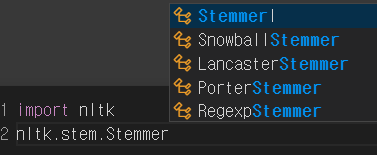
- nltk에서 stemming을 위한 여러 패키지를 제공하며, 그 중 하나인 porterstemmer을 사용해볼 예정
---
porterstemmer 규칙
- -alize -> -al [normalize : normal]
- -ance -> 제거 [endurenace : eudure]
- -ical -> -ic [logical : logic]
- s&es -> s 제거
- -y : -i로 변경
- e, te -> e 제거
- 등등

In [ ]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
text = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words = word_tokenize(text)
print(words)

porterstemmer = PorterStemmer()
print([porterstemmer.stem(word) for word in words])

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [ ]:
words=['formalize', 'allowance', 'electricical']
print(words)
print([porterstemmer.stem(w) for w in words])

['formalize', 'allowance', 'electricical']
['formal', 'allow', 'electric']


## 영어 : Lemmatization(표제어 추출)
---
- 표제어 추출은, 단어 형태가 다르더라도 그 뿌리 단어를 찾아서 반환하므로 단어의 개수를 줄이고 빈도수를 높일 수 있음.
- 예를 들어, am, are, is는 다른 스펠링이지만 be동사의 다른 형태이므로 표제어인 be로 변환하여 추출됨

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
wordnetlemmatizer = WordNetLemmatizer()
print(words)
print([wordnetlemmatizer.lemmatize(word) for word in words])

['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


lives는 life로 잘 바뀌었지만, dies는 dy, has는 ha로 바뀐 것은 품사를 잘못이 판단했기 때문

## 한국어 : Stemming & Lemmatization(Okt가 제공)

In [ ]:
text = "북한은 하루새 3차례에 걸쳐 대미·대남 압박 메시지를 내놓았다."
print(okt.morphs(text))
print(okt.morphs(text, stem=True))
print(okt.pos(text))
print(okt.pos(text, stem=True))

['북한', '은', '하루', '새', '3', '차례', '에', '걸쳐', '대미', '·', '대남', '압박', '메시지', '를', '내놓았다', '.']
['북한', '은', '하루', '새', '3', '차례', '에', '걸치다', '대미', '·', '대남', '압박', '메시지', '를', '내놓다', '.']
[('북한', 'Noun'), ('은', 'Josa'), ('하루', 'Noun'), ('새', 'Noun'), ('3', 'Number'), ('차례', 'Noun'), ('에', 'Josa'), ('걸쳐', 'Verb'), ('대미', 'Noun'), ('·', 'Punctuation'), ('대남', 'Noun'), ('압박', 'Noun'), ('메시지', 'Noun'), ('를', 'Josa'), ('내놓았다', 'Verb'), ('.', 'Punctuation')]
[('북한', 'Noun'), ('은', 'Josa'), ('하루', 'Noun'), ('새', 'Noun'), ('3', 'Number'), ('차례', 'Noun'), ('에', 'Josa'), ('걸치다', 'Verb'), ('대미', 'Noun'), ('·', 'Punctuation'), ('대남', 'Noun'), ('압박', 'Noun'), ('메시지', 'Noun'), ('를', 'Josa'), ('내놓다', 'Verb'), ('.', 'Punctuation')]


In [ ]:
text = "웃기는 소리하지마랔ㅋㅋㅋ"
print(okt.morphs(text))
print(okt.morphs(text, norm=True))
print(okt.pos(text))
print(okt.pos(text, norm=True))

['웃기는', '소리', '하지마', '랔', 'ㅋㅋㅋ']
['웃기는', '소리', '하지마라', 'ㅋㅋㅋ']
[('웃기는', 'Verb'), ('소리', 'Noun'), ('하지마', 'Verb'), ('랔', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle')]
[('웃기는', 'Verb'), ('소리', 'Noun'), ('하지마라', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle')]


## 한국어 Norm : 반복되는 문자 정제(soynlp)
---
- soynlp는 복합 명사를 추출할 수 있는 토크나이저도 제공
- soynlp는 엄밀히 말해서 형태소 분석기는 아니고, 단어를 쪼개는 기능은 있지만, 학습기반으로 돌아가면서 내부적으로는 계속 같이 등장하는 단어는 하나로 인식

In [ ]:
!pip install soynlp

     |████████████████████████████████| 419kB 8.8MB/s 


In [ ]:
from soynlp.normalizer import *

In [ ]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

print(repeat_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(repeat_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(repeat_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(repeat_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
앜ㅋㅋ이영화존잼쓰ㅠㅠ
앜ㅋㅋ이영화존잼쓰ㅠㅠ
앜ㅋㅋ이영화존잼쓰ㅠㅠ
앜ㅋㅋ이영화존잼쓰ㅠㅠ


- repeat_normalize는 단순하게 반복되는 단어에 대해서 줄여주는 기능을 수행
- emoticon_normalize는 반복되는 단어도 줄여주면서, 정규화를 진행

## 한국어 Norm : 맞춤법 교정(hanspell)
---
hanspell은 맞춤법 교정도 해주지만, 사실 띄어쓰기 교정도 해줌

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-355uxn0c
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-355uxn0c
  Created wheel for py-hanspell: filename=py_hanspell-1.1-cp37-none-any.whl size=4871 sha256=040593baff6abb10283101e22f283ade6cd5c6334b52233f8956302a57fca968
  Stored in directory: /tmp/pip-ephem-wheel-cache-sf7r5a7g/wheels/0a/25/d1/e5e96476dbb1c318cc26c992dd493394fe42b0c204b3e65588
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker
 
sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)
print(spelled_sent)
hanspell_sent = spelled_sent.checked
print(hanspell_sent)

Checked(result=True, original='맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 ', checked='맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지', errors=2, words=OrderedDict([('맞춤법', 0), ('틀리면', 0), ('왜', 1), ('안돼?', 1), ('쓰고', 1), ('싶은', 1), ('대로', 1), ('쓰면', 1), ('되지', 1)]), time=0.7117440700531006)
맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [ ]:
sent = '오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
sent1 = '오지호는 극중두얼굴의사나이성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
new_sent = sent.replace(" ","")
print("정상 문장: ","\n", sent)
print("띄어쓰기가 일부만 안 된 문장: ","\n", sent1)
print("띄어쓰기가 안 된 문장: ","\n",new_sent)
print("Kospacing 결과: ","\n", spacing(new_sent))
print("Kospacing 결과(일부만 안 된 문장): ","\n", spacing(sent1))
print("Hanspell 결과: ","\n", spell_checker.check(new_sent).checked)
print("Hanspell 결과(일부만 안 된 문장): ","\n",spell_checker.check(sent1).checked)

정상 문장:  
 오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.
띄어쓰기가 일부만 안 된 문장:  
 오지호는 극중두얼굴의사나이성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.
띄어쓰기가 안 된 문장:  
 오지호는극중두얼굴의사나이성준역을맡았다.성준은국내유일의태백권전승자를가리는결전의날을앞두고20년간동고동락한사형인진수(정의욱분)를찾으러속세로내려온인물이다.
Kospacing 결과:  
 오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.
Kospacing 결과(일부만 안 된 문장):  
 오지호는 극 중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결 전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속 세로 내려온 인물이다.
Hanspell 결과:  
 오지호는 극 중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정인욱 분)를 찾으러 속세로 내려온 인물이다.
Hanspell 결과(일부만 안 된 문장):  
 오지호는 극 중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정인욱 분)를 찾으러 속세로 내려온 인물이다.


## Text Cleaning & Stopwords
---
- 생략
- Cleaning의 경우 정규표현식(re 패키지)를 활용하여 필요한 문자만 남기면 됨
- Stopwords, 즉 불용어는 nltk.corpus.stopwords를 활용하면 되며, 영어의 경우는 어느 해당 패키지를 이용하면 되지만, 한국어의 경우 필요한 단어를 일일이 직접 찾아서 제외시켜야 함
- 영어도 마찬가지로, 번역기의 경우는 불용어를 사용하지 않으며, 기타 업무 시 필요할 경우 불용어 처리를 하여 진행

## Integer Encoding(정수인코딩)
---
컴퓨터는 문자열보단 숫자를 더 잘 처리하기에, 자연어 처리에서는 텍스트를 숫자로 변환하는 방법을 사용하여 각 단어를 고유한 정수에 맵핑 시키는 전처리 작업이 필요


In [ ]:
text = "A barber is a person. a barber is good person. a barber is huge person. \
        he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. \
        His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. \
        the barber went up a huge mountain."

### sentence Tokenization

In [ ]:
text = sent_tokenize(text)
text

['A barber is a person.',
 'a barber is good person.',
 'a barber is huge person.',
 'he Knew A Secret!',
 'The Secret He Kept is huge secret.',
 'Huge secret.',
 'His barber kept his word.',
 'a barber kept his word.',
 'His barber kept his secret.',
 'But keeping and keeping such a huge secret to himself was driving the barber crazy.',
 'the barber went up a huge mountain.']

### Word Tokenization
1. 불용어 제거   
2. 소문자화   
3. 단어 길이 2이하 제거

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
sentences = []

for i in text:
    sentence = word_tokenize(i)
    sentences.append([word.lower() for word in sentence if word not in stop_words and len(word)>2])
sentences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['the', 'secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['his', 'barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['his', 'barber', 'kept', 'secret'],
 ['but', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]

### Build Vocabulary(Python)
단어 집합 생성

In [ ]:
from collections import Counter

words = sum(sentences, [])
print(words)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'the', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'his', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'his', 'barber', 'kept', 'secret', 'but', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [ ]:
vocab = Counter(words)
vocab

Counter({'barber': 8,
         'but': 1,
         'crazy': 1,
         'driving': 1,
         'good': 1,
         'his': 2,
         'huge': 5,
         'keeping': 2,
         'kept': 4,
         'knew': 1,
         'mountain': 1,
         'person': 3,
         'secret': 6,
         'the': 1,
         'went': 1,
         'word': 2})

### Integer Encoding(python)
빈도수 기준으로 내림차순으로 정렬하여, 빈도수가 높을 수록 낮은 정수를 부여   
이렇게 하면 빈도수가 낮은 단어를 제외시키면서 단어 집합의 크기를 조절할 수 있음

In [ ]:
# vocab_sorted = sorted(vocab.items(), key = lambda x : -x[1])
# vocab_sorted = sorted(vocab.items(), key = lambda x : x[1], reverse = True)

#상기와 같이 sorted를 활용할 수 있지만, most_common을 사용 시 동일한 정렬 가능
vocab_sorted = vocab.most_common()
vocab_sorted

[('barber', 8),
 ('secret', 6),
 ('huge', 5),
 ('kept', 4),
 ('person', 3),
 ('his', 2),
 ('word', 2),
 ('keeping', 2),
 ('good', 1),
 ('knew', 1),
 ('the', 1),
 ('but', 1),
 ('driving', 1),
 ('crazy', 1),
 ('went', 1),
 ('mountain', 1)]

In [ ]:
word2idx = {w : i for i,(w,n) in enumerate(vocab_sorted, start = 1)}
word2idx

{'barber': 1,
 'but': 12,
 'crazy': 14,
 'driving': 13,
 'good': 9,
 'his': 6,
 'huge': 3,
 'keeping': 8,
 'kept': 4,
 'knew': 10,
 'mountain': 16,
 'person': 5,
 'secret': 2,
 'the': 11,
 'went': 15,
 'word': 7}

자연어 처리를 하다보면, 텍스트 데이터에 있는 단어를 모두 사용하기 보다는 빈도수가 가장 높은 n개의 단어만 사용하고 싶은 경우가 많습니다. 위 단어들은 빈도수가 높은 순으로 낮은 정수가 부여되어져 있으므로 빈도수 상위 n개의 단어만 사용하고 싶다고하면 vocab에서 정수값이 1부터 n까지인 단어들만 사용하면 됩니다. 여기서는 상위 5개 단어만 사용한다고 가정

In [ ]:
vocab_size = 5
word2idx = {w : i for w,i in word2idx.items() if i <=vocab_size}
word2idx

#강사님의 경우 아래와 같이 코드를 작성했지만, del은 시간복잡도가 O(n)이며, 자주 반복해야 하기에 느림
# vocab_size = 5
# words_frequency = [w for w,c in word2idx.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del word2idx[w] # 해당 단어에 대한 인덱스 정보를 삭제

{'barber': 1, 'huge': 3, 'kept': 4, 'person': 5, 'secret': 2}

이제 word2idx에는 빈도수가 높은 상위 5개의 단어만 저장되었습니다. 이제 word2idx를 사용하여 단어 토큰화가 된 상태로 저장된 sentences에 있는 각 단어를 정수로 바꾸는 작업을 하겠습니다.

예를 들어 sentences에서 첫번째 문장은 ['barber', 'person']이었는데, 이 문장에 대해서는 [1, 5]로 인코딩합니다. 그런데 두번째 문장인 ['barber', 'good', 'person']에는 더 이상 word2idx에는 존재하지 않는 단어인 'good'이라는 단어가 있습니다.  

이처럼 단어 집합에 존재하지 않는 단어들을 Out-Of-Vocabulary(단어 집합에 없는 단어)의 약자로 'OOV'라고 합니다. word_to_index에 'OOV'란 단어를 새롭게 추가하고, 단어 집합에 없는 단어들은 'OOV'의 인덱스로 인코딩

OOV는 일종의 용어고, 보통 UNK라고 부름(Unknown)

In [ ]:
word2idx["UNK"] = 6
word2idx

{'UNK': 6, 'barber': 1, 'huge': 3, 'kept': 4, 'person': 5, 'secret': 2}

In [ ]:
sentences

[['barber', 'person'],
 ['barber', 'good', 'person'],
 ['barber', 'huge', 'person'],
 ['knew', 'secret'],
 ['the', 'secret', 'kept', 'huge', 'secret'],
 ['huge', 'secret'],
 ['his', 'barber', 'kept', 'word'],
 ['barber', 'kept', 'word'],
 ['his', 'barber', 'kept', 'secret'],
 ['but', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
 ['barber', 'went', 'huge', 'mountain']]

In [ ]:
encoded = [[word2idx[w] if w in word2idx else word2idx["UNK"] for w in s] for s in sentences]
encoded

[[1, 5],
 [1, 6, 5],
 [1, 3, 5],
 [6, 2],
 [6, 2, 4, 3, 2],
 [3, 2],
 [6, 1, 4, 6],
 [1, 4, 6],
 [6, 1, 4, 2],
 [6, 6, 6, 3, 2, 6, 1, 6],
 [1, 6, 3, 6]]

### Build Vocab & Integer Encoding(by Tensorflow)
---
텐서플로우의 keras.preprocessing.text.Tokenizer도 동일한 기능을 제공

num_words에 +2를 하는 이유는,   
num_words에서 +1을 더해서 값을 넣어주는 이유는 num_words는 숫자를 0부터 카운트합니다. 만약 5를 넣으면 0 ~ 4번 단어 보존을 의미하게 되므로 뒤의 실습에서 1번 단어부터 4번 단어만 남게됩니다. 그렇기 때문에 1 ~ 5번 단어까지 사용하고 싶다면 num_words에 숫자 5를 넣어주는 것이 아니라 5+1인 값을 넣어주어야 합니다. 또한 상위 6번째부터는 OOV 처리를 하고자 하면 +1을 하여 총 5+2의 값을 넣어줘야 합니다.

실질적으로 숫자 0에 지정된 단어가 존재하지 않는데도 케라스 토크나이저가 숫자 0까지 단어 집합의 크기로 산정하는 이유는 자연어 처리에서 패딩(padding)이라는 작업 때문입니다. 이에 대해서는 뒤에 다루게 되므로 여기서는 케라스 토크나이저를 사용할 때는 숫자 0도 단어 집합의 크기로 고려해야한다고만 이해합시다.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token="UNK") #1개는 UNK, 1개는 패딩
tokenizer.fit_on_texts(sentences)

print(sentences)
print(tokenizer.texts_to_sequences(sentences))
print(tokenizer.word_index)
print(tokenizer.word_counts)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['the', 'secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['his', 'barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['his', 'barber', 'kept', 'secret'], ['but', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [1, 3, 5, 4, 3], [4, 3], [1, 2, 5, 1], [2, 5, 1], [1, 2, 5, 3], [1, 1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]
{'UNK': 1, 'barber': 2, 'secret': 3, 'huge': 4, 'kept': 5, 'person': 6, 'his': 7, 'word': 8, 'keeping': 9, 'good': 10, 'knew': 11, 'the': 12, 'but': 13, 'driving': 14, 'crazy': 15, 'went': 16, 'mountain': 17}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('the', 1), ('kept', 4), ('his', 2), ('word', 2), ('but', 1), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


## 한국어 : Tokenization ~ Integer Encoding까지 해보기

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f21d0dca990>)

In [ ]:
train_data = pd.read_table("ratings_test.txt")
print("데이터 길이: ", len(train_data))
train_data.head()

데이터 길이:  50000


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
train_data.describe(include="all")

,id,document,label
count,5.000000e+04,49997,50000.000000
unique,NaN,49157,NaN
top,NaN,굿,NaN
freq,NaN,56,NaN
mean,6.728496e+06,NaN,0.503460
std,2.936824e+06,NaN,0.499993
min,6.010000e+02,NaN,0.000000
25%,4.736397e+06,NaN,0.000000
50%,7.530602e+06,NaN,1.000000
75%,9.246413e+06,NaN,1.000000


document에 중복도 존재하고, 불필요한 단어도 포함되어 있음. 우선 내용부터 정리

In [ ]:
#중복 제거
train_data = train_data.drop_duplicates(subset = "document")
train_data.describe(include ="all")

,id,document,label
count,4.915800e+04,49157,49158.000000
unique,NaN,49157,NaN
top,NaN,목수의 아들과 아들을 죽인 어린 살인범. 얼핏 용서와 화해를 통한 새로운 가족의 탄...,NaN
freq,NaN,1,NaN
mean,6.752816e+06,NaN,0.502706
std,2.937268e+06,NaN,0.499998
min,6.010000e+02,NaN,0.000000
25%,4.776917e+06,NaN,0.000000
50%,7.565128e+06,NaN,1.000000
75%,9.260100e+06,NaN,1.000000


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data["document"] = train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data["document"] = train_data["document"].replace("", np.nan)
train_data["document"].head(10)

# nan 제거
train_data = train_data.dropna()

In [ ]:
train_data.describe(include ="all")

,id,document,label
count,4.899500e+04,48995,48995.000000
unique,NaN,48417,NaN
top,NaN,,NaN
freq,NaN,38,NaN
mean,6.755322e+06,NaN,0.502704
std,2.936505e+06,NaN,0.499998
min,6.010000e+02,NaN,0.000000
25%,4.777588e+06,NaN,0.000000
50%,7.569296e+06,NaN,1.000000
75%,9.261630e+06,NaN,1.000000


불용어 정의

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

형태소 분석기 Okt 사용 및 Stem = True

In [ ]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
X_train = [word for s in train_data.document for word in okt.morphs(s, stem = True) if word not in stopwords]
X_train[:10]

['굳다', 'ㅋ', '뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(sorted(tokenizer.word_counts.items(),key = lambda x : -x[1]))

[('영화', 17231), ('보다', 13796), ('을', 7691), ('없다', 5308), ('이다', 4484), ('있다', 4129), ('좋다', 4008), ('너무', 3735), ('다', 3388), ('정말', 3241), ('되다', 3030), ('재밌다', 2984), ('만', 2976), ('진짜', 2927), ('적', 2907), ('같다', 2825), ('아니다', 2667), ('로', 2648), ('않다', 2555), ('점', 2531), ('에서', 2330), ('만들다', 2236), ('평점', 2210), ('나오다', 2168), ('연기', 2161), ('것', 2127), ('내', 1975), ('최고', 1950), ('그', 1933), ('인', 1884), ('안', 1852), ('나', 1847), ('생각', 1824), ('게', 1744), ('못', 1743), ('왜', 1706), ('스토리', 1696), ('드라마', 1642), ('사람', 1641), ('감동', 1631), ('보고', 1520), ('때', 1519), ('이렇다', 1516), ('더', 1509), ('고', 1481), ('아깝다', 1453), ('말', 1445), ('감독', 1411), ('배우', 1401), ('ㅋㅋ', 1383), ('아', 1375), ('그냥', 1350), ('내용', 1347), ('거', 1341), ('중', 1334), ('까지', 1333), ('재미있다', 1313), ('재미', 1306), ('시간', 1279), ('주다', 1275), ('요', 1266), ('자다', 1230), ('재미없다', 1180), ('뭐', 1178), ('하고', 1169), ('지루하다', 1159), ('가다', 1153), ('수', 1117), ('네', 1094), ('들다', 1089), ('쓰레기', 1068), ('사랑', 1061), 

## padding

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], 
             ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'],
             ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'],
             ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
             ['barber', 'went', 'huge', 'mountain']]

In [ ]:
max_len = max(len(s) for s in sentences)
max_len

7

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
encoded = tokenizer.texts_to_sequences(sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


### numpy


In [ ]:
encoded_np = np.array(encoded)
for c in encoded_np:
  c += [0]*(max_len - len(c))
padded_np = np.array(encoded)
padded_np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

### tensorflow

In [ ]:
padded = pad_sequences(encoded, maxlen=max_len,padding = "post")
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]], dtype=int32)

In [ ]:
(padded_np == padded).all()

True

## One-hot Encoding

In [ ]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [ ]:
token = okt.morphs(text)
print((token))

['나', '랑', '점심', '먹으러', '갈래', '점심', '메뉴', '는', '햄버거', '갈래', '갈래', '햄버거', '최고', '야']


### python

In [ ]:
word2idx = {"PAD" : 0}
for i,(word,_) in enumerate(Counter(token).most_common(), start = 1):
   if word not in word2idx:
       word2idx[word] = i
print(word2idx)

{'PAD': 0, '갈래': 1, '점심': 2, '햄버거': 3, '나': 4, '랑': 5, '먹으러': 6, '메뉴': 7, '는': 8, '최고': 9, '야': 10}


In [ ]:
def one_hot_eocoding(word, word2idx):
    one_hot_vector = [0]*len(word2idx)
    one_hot_vector[word2idx[word]] = 1
    return one_hot_vector

In [ ]:
list(map(lambda x: one_hot_eocoding(x,word2idx), token))

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

### tensorflow

In [ ]:
from tensorflow.keras.utils import to_categorical
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"
tokenizer = Tokenizer()
tokenizer.fit_on_texts([okt.morphs(text)])
print(tokenizer.word_index)

{'갈래': 1, '점심': 2, '햄버거': 3, '나': 4, '랑': 5, '먹으러': 6, '메뉴': 7, '는': 8, '최고': 9, '야': 10}


- vocab size는 10이지만 one-hot Encoding 시 11시의 벡터 차원으로 출력됨
- 0번 값이 존재할 것이라는 판단 하에 진행

In [ ]:
encoded = tokenizer.texts_to_sequences([okt.morphs(text)])
to_categorical(encoded)

array([[[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)